In [115]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib


import sys
sys.path.append("../src")

import feature_engineering as fe
import data_preprocessing as dp
import random_forest_train as rft

importlib.reload(dp)
from data_preprocessing import TennisPreprocessor

importlib.reload(rft) 
from random_forest_train import RandomForest

In [116]:
path_to_df = "../data/raw/atp_tennis.csv"
path_to_df_processed = "../data/processed/atp_tennis_processed.csv"

df = pd.read_csv(path_to_df)
df_processed = df.copy()

In [117]:
df_processed = fe.process_features(df_processed)

In [118]:
# df_processed, X_train, y_train, X_test, y_test, label_encoders = dp.preprocess_data(df_processed)

preprocessor = TennisPreprocessor(cutoff_date="2024-01-01")
X_train, y_train, X_test, y_test = preprocessor.fit_transform(df_processed)


=== FIT & TRANSFORM PREPROCESSOR ===
✅ Preprocessor saved to ../data/labels/preprocessor.pkl


In [119]:
print("\n" + "=" * 70)
print("FEATURE ANALYSIS - OUTLIER DETECTION")
print("=" * 70)

# Converti X_train in DataFrame per analizzare meglio
# (Salva i nomi delle colonne prima dello scaling)
# Supponendo che tu abbia ancora accesso a X_train prima dello scaling

# Analizza il range per ogni feature
for i in range(X_train.shape[1]):
    col_min = X_train[:, i].min()
    col_max = X_train[:, i].max()
    col_mean = X_train[:, i].mean()
    col_std = X_train[:, i].std()
    
    # Segnala colonne con valori estremi
    if abs(col_min) > 10 or abs(col_max) > 10:
        print(f"⚠️  Feature {i}: min={col_min:.2f}, max={col_max:.2f}, mean={col_mean:.2f}, std={col_std:.2f}")

# Conta quanti valori sono oltre ±5 std
extreme_values = np.sum((X_train < -5) | (X_train > 5))
total_values = X_train.size
print(f"\n📊 Extreme values (|z| > 5): {extreme_values} / {total_values} ({extreme_values/total_values*100:.2f}%)")


print("=" * 70)
print("DATA VERIFICATION")
print("=" * 70)
print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"X_train dtype: {X_train.dtype}")
print(f"X_train range: [{X_train.min():.2f}, {X_train.max():.2f}]")
print(f"\ny_train type: {type(y_train)}")
print(f"y_train shape: {y_train.shape}")
print(f"y_train unique values: {np.unique(y_train)}")
print(f"y_train distribution: {np.bincount(y_train)}")
print(f"\nX_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_test distribution: {np.bincount(y_test)}")


FEATURE ANALYSIS - OUTLIER DETECTION
⚠️  Feature 8: min=-0.76, max=32.86, mean=-0.00, std=1.00
⚠️  Feature 9: min=-0.75, max=47.66, mean=0.00, std=1.00
⚠️  Feature 12: min=-1.27, max=24.17, mean=0.00, std=1.00
⚠️  Feature 13: min=-1.29, max=18.51, mean=0.00, std=1.00
⚠️  Feature 14: min=-35.51, max=24.44, mean=0.00, std=1.00
⚠️  Feature 16: min=-12.43, max=16.41, mean=-0.00, std=1.00
⚠️  Feature 17: min=-0.41, max=19.05, mean=0.00, std=1.00
⚠️  Feature 18: min=-0.41, max=19.54, mean=-0.00, std=1.00
⚠️  Feature 19: min=-12.42, max=12.43, mean=0.00, std=1.00
⚠️  Feature 45: min=-0.51, max=15.02, mean=-0.00, std=1.00
⚠️  Feature 47: min=-0.61, max=12.50, mean=-0.00, std=1.00
⚠️  Feature 49: min=-0.51, max=14.42, mean=0.00, std=1.00
⚠️  Feature 51: min=-0.61, max=12.50, mean=-0.00, std=1.00
⚠️  Feature 54: min=-10.43, max=10.63, mean=0.00, std=1.00
⚠️  Feature 55: min=-0.23, max=73.81, mean=-0.00, std=1.00
⚠️  Feature 56: min=-0.23, max=66.08, mean=-0.00, std=1.00
⚠️  Feature 57: min=-50.

In [120]:
# Define numeric columns

numeric_cols = df_processed.select_dtypes(include=np.number).columns

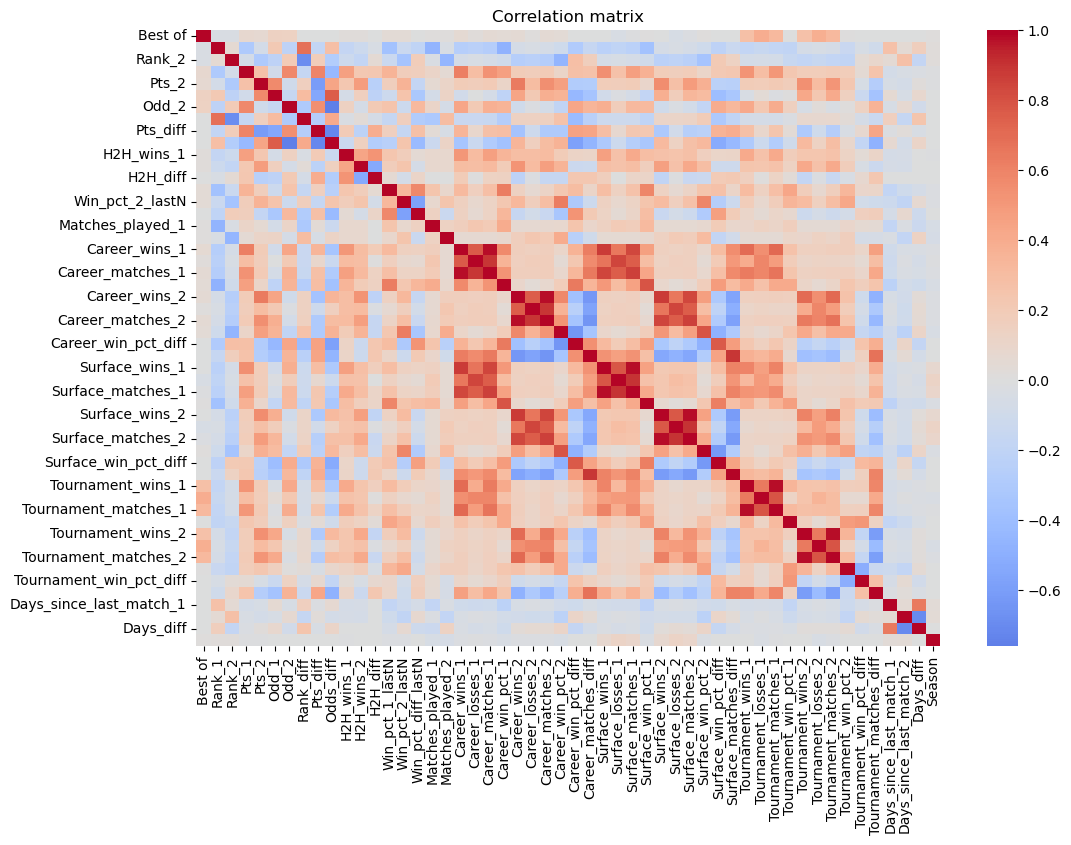

In [121]:
# Plot Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df_processed[numeric_cols].corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation matrix")
plt.show()

In [122]:
df_processed.to_csv(path_to_df_processed, index=False)

✓ Converted numpy arrays to DataFrames with 59 features
✓ Data validation completed successfully

DATA INFORMATION
Training Set:
  Samples:                61562
  Features:               59
  Class Distribution:
    Class 0 (Player 2):   30781 (50.00%)
    Class 1 (Player 1):   30781 (50.00%)

Test Set:
  Samples:                4717
  Features:               59
  Class Distribution:
    Class 0 (Player 2):   2358 (49.99%)
    Class 1 (Player 1):   2359 (50.01%)

Total Samples:            66279
Train/Test Split:         92.88% / 7.12%

✓ Model built successfully

TRAINING MODEL
Training Bagging Random Forest model...


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:   19.1s remaining:  1.6min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   20.3s finished


✓ Training completed!



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    2.0s remaining:   10.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.8s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.4s remaining:    2.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    1.9s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    2.2s remaining:   11.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    4.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.5s remaining:    2.4s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    1.9s finished


✓ Predictions generated

PERFORMANCE METRICS

1. ACCURACY METRICS
----------------------------------------------------------------------
Training Accuracy:        0.8594 (85.94%)
Test Accuracy:            0.6814 (68.14%)
Out-of-Bag (OOB) Score:   0.7091 (70.91%)
Overfitting Gap:          0.1781

2. PRECISION, RECALL, F1-SCORE
----------------------------------------------------------------------
                    Training Set    Test Set
Precision:          0.8572          0.6845
Recall:             0.8625          0.6732
F1-Score:           0.8599          0.6788

3. ROC-AUC SCORE
----------------------------------------------------------------------
Training ROC-AUC:         0.9441
Test ROC-AUC:             0.7467

4. PRECISION-RECALL AUC
----------------------------------------------------------------------
Training PR-AUC:          0.9472
Test PR-AUC:              0.7389

5. CONFUSION MATRIX (Test Set)
----------------------------------------------------------------------

      

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  7.9min
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  8.0min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  8.2min
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  8.2min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:

ACCURACY    : 0.6821 (+/- 0.0122)


[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.5min remaining:  7.6min
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.5min remaining:  7.7min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:

PRECISION   : 0.6849 (+/- 0.0136)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.5min remaining:  7.3min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.5min remaining:  7.6min
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.5min remaining:  7.7min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  7.8min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:

RECALL      : 0.6751 (+/- 0.0162)


[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.5min remaining:  7.7min
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  7.8min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.5min remaining:  7.7min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:

F1          : 0.6799 (+/- 0.0126)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  7.8min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  8.0min
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  8.1min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:  1.6min remaining:  8.1min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.6min finished
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:

ROC_AUC     : 0.7465 (+/- 0.0117)

✓ Plot saved to: ../results/tennis_rf_results.png

MODEL SUMMARY
Model Type:               Bagging Random Forest
Number of Estimators:     2000
Max Samples per Tree:     0.8
Max Features per Tree:    0.8
Bootstrap Sampling:       True
Base Estimator:           Decision Tree
  - Max Depth:            15
  - Min Samples Split:    5
  - Feature Sampling:     sqrt

Data Split:
  Training Samples:       61562
  Test Samples:           4717
  Number of Features:     59

Performance:
  Test Accuracy:          0.6814 (68.14%)
  Test F1-Score:          0.6788
  Test ROC-AUC:           0.7467
  OOB Score:              0.7091
✓ Model saved to: ../models/tennis_rf_model.pkl

🎾 Final Test Accuracy: 68.14%


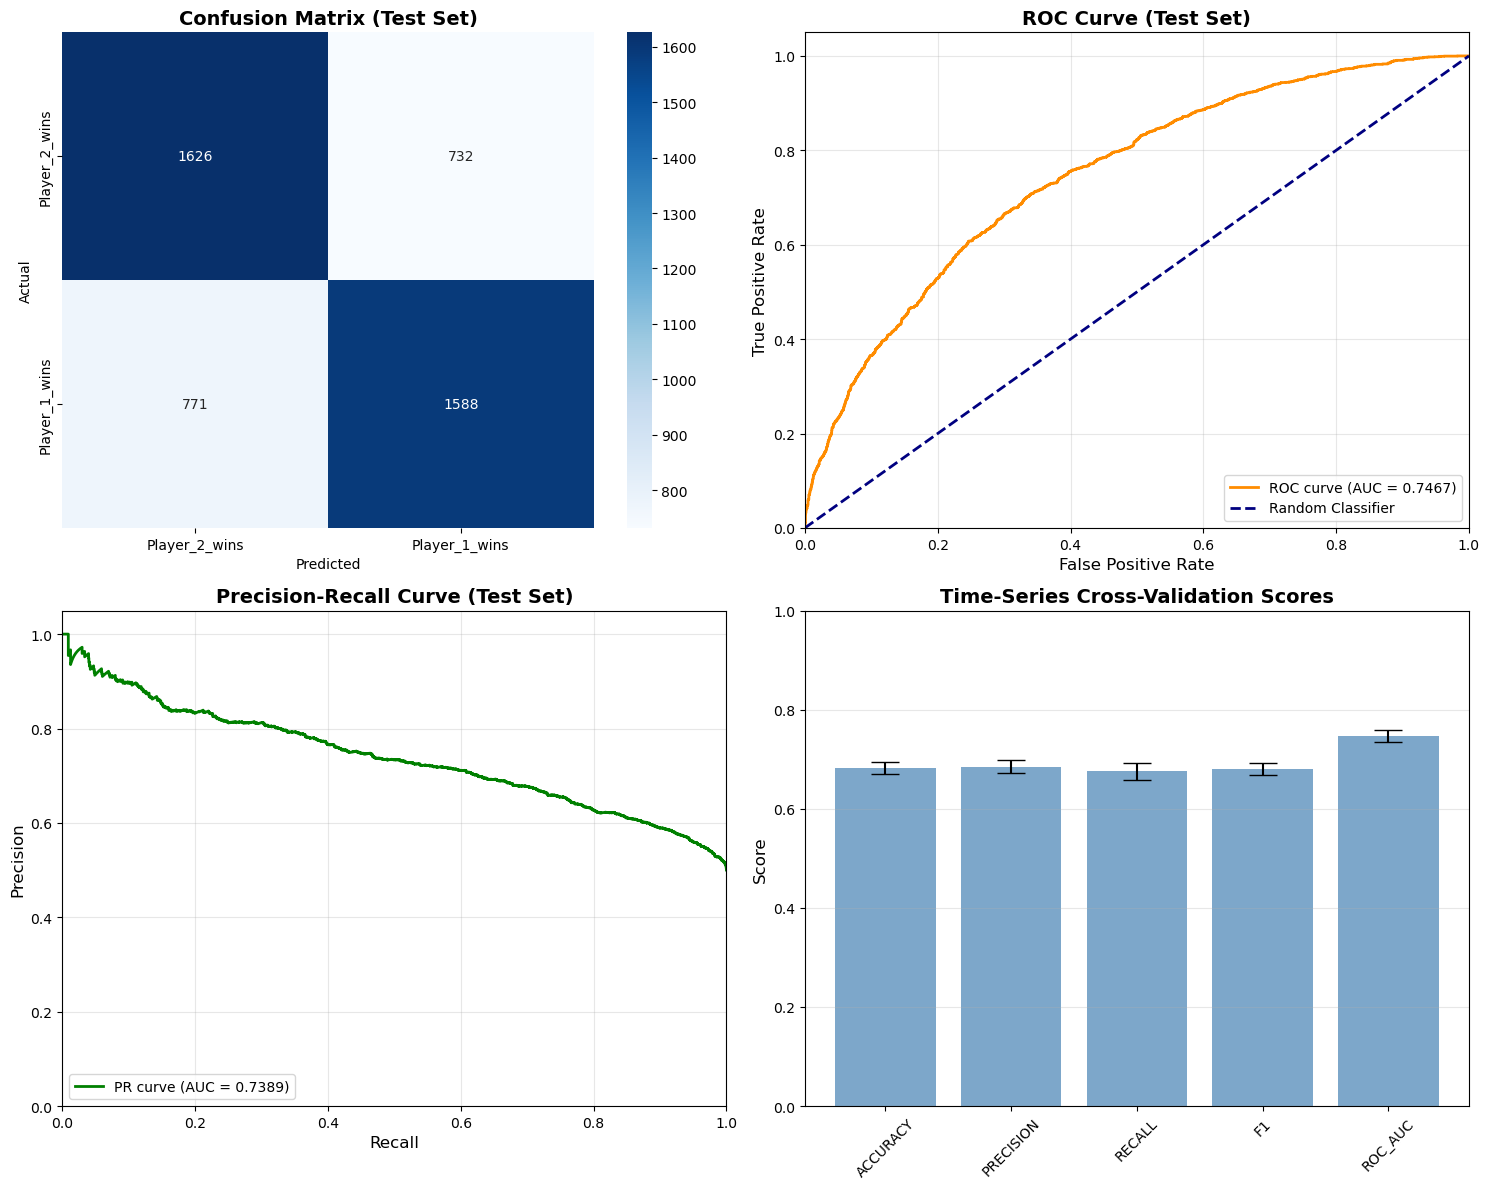

In [126]:
random_forest = RandomForest(X_train, y_train, X_test, y_test)
metrics = random_forest.run_full_pipeline(
    run_cv=True, 
    plot_results=True,
    save_plot_path='../results/tennis_rf_results.png'
)

random_forest.save_model('../models/tennis_rf_model.pkl')

print(f"\n🎾 Final Test Accuracy: {metrics['test_accuracy']*100:.2f}%")
